# Hough transform

## Line detection

The simplest boundary you can detect is a line and more complex boundaries are often made up of several lines. When you do edge detection you'll find that edges when pieced together form longer line segments and shapes. We can think of representing any line as a function of space. In image space the equation that represents a line is $y=m x + b$ where $m$ is the slope of the line and $b$ is how far it shifted up or down.

A useful transformation is moving this line representation from image space to Hough space, also called parameter space. The Hough transform converts data points from image space to Hough space and represents a line in the simplest way: as a point at the coordinate $m_0$, $b_0$ which are the same $m$ and $b$ from the line equation $y=m x + b$.

![Hough transform](images/hough_transform.png)

Patterns in Hough space can help us identify lines or other shapes. For example, look at these two lines in Hough space that intersect at the point m_b_0. In image space, it's the line with the equation $y = m_0 x + b_0.$

![Hough transform, image space](images/hough_transform_2.png)

And if we have a line made of mini segments or points close to the same line equation in image space this turns into many intersecting lines in Hough space. Imagine this line as part of an edge detected image where a line just has some small discontinuities in it. Our strategy then for finding continuous lines in an image is to look at intersection points in Hough space.

![Hough transform, continuous line](images/hough_transform_3.png)

Straight up and down lines have an infinite slopes. A better way to transform image space is by turning Hough space into polar coordinates. Instead of $m$ and $b$, $rho$, which is the distance of the line from the origin and $\theta$ which is the angle from the horizontal axis are used. A fragmented line or points that fall in a line can be identified in Hough space as the intersection of sinusoids.

![Hough transform, sinusoidal intersection](images/hough_transform_4.png)

## Hough Lines detection

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

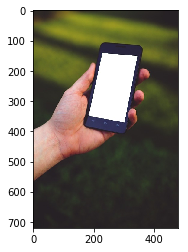

In [86]:
# read and display de image
image = cv2.imread('images/phone.jpg')

image_copy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

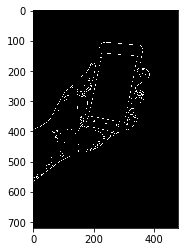

In [87]:
# convert to gray scale and perform edge detection
image_gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Canny parmeters
low = 50
high = 100

image_edges = cv2.Canny(image_gray, low, high)

plt.imshow(image_edges, cmap="gray")

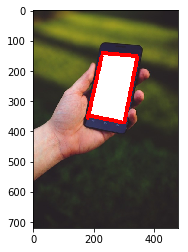

In [153]:
# define the Hough transform parameters
# make a blank the same size as our image to draw on
rho = 3
theta = np.pi/270
threshold = 10
min_line_length = 100
max_line_gap = 5

line_image = np.copy(image_copy)

# run Hough on the edge-detected image
lines = cv2.HoughLinesP(image_edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),12)
        
plt.imshow(line_image)